In [17]:
# import the necessary packages
from scipy.spatial import distance as dist  # provides functions for computing distances
from scipy.spatial import Voronoi
from shapely.geometry import Polygon
import pickle
from collections import OrderedDict 
import numpy as np  # y'all already know
from __future__ import print_function
import cv2 as cv
import argparse
import random as rng
import matplotlib.pyplot as plt

In [18]:
file_path = 'SheepVars_ObsExperiment16.pkl'
with open(file_path, 'rb') as f:
    inputs = pickle.load(f)


In [39]:
#[U,Unorms,LArr,pressure,tmax,genAtT]

vNormMeans = []
vNormStds = []
for l in inputs:
    vNormMeans.append(np.mean(l[1]))
    vNormStds.append(np.std(l[1]))

0.4800017685470678


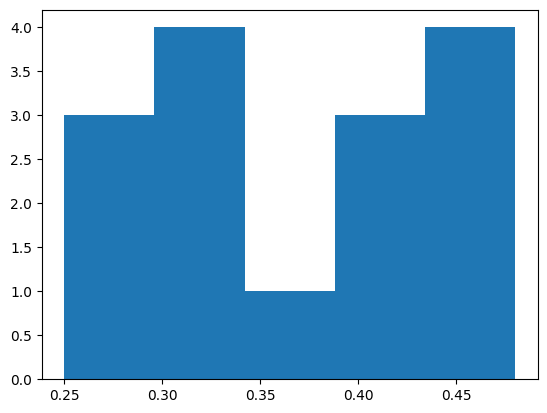

In [40]:
#getting Vmax Sheep:

vmax = []
for i in range(16):
    vmax.append(vNormMeans[i]+3*vNormStds[i])
vmax = np.array(vmax)
vmax = vmax[~np.isnan(vmax)]
print(np.max(vmax)*30)
plt.hist(vmax*30,bins=5)
plt.show()

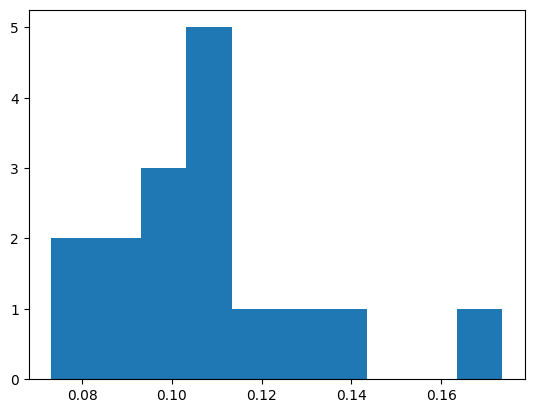

0.10788986108951215


In [58]:
#Getting L for the sheep:
finalL = []
for i in range(16):
    Larr = np.array(inputs[i][2])
    
    q1 = np.percentile(Larr, 25)
    q3 = np.percentile(Larr, 75)
    iqr = q3 - q1
    h = (iqr*np.power(np.size(Larr),-1/3))
    numBins = int(np.round((np.max(Larr)-np.min(Larr))/h))
    counts, bins = np.histogram(Larr,bins=numBins)
    indexMax = np.argmax(counts)
    lowerBound = (bins[indexMax])
    upperBound = (bins[indexMax+1])
    aboveLower = Larr[Larr>=lowerBound]
    inBounds = aboveLower[aboveLower<upperBound]
    L = np.mean(inBounds)
    finalL.append(L)
#     plt.hist(Larr,bins=numBins)
#     plt.show()

plt.hist(finalL)
plt.show()
print(np.mean(np.array(finalL)))